# Projeto 1 - Ciência dos Dados #

**Matheus Amaral Ricardo**

**Pergunta**: O Protocolo de Kyoto foi criado visando a diminuição de gases estufa. Os países que estão dentro deste emitem mais gás carbônico que os que não estão no acordo? O PIB dos países reflete na emissão deste gás?

**Hipótese**: Países que emitiam maiores níveis de gás carbônico eram os mais ricos (com maior PIB per capita), logo assinaram o Protocolo de Kyoto visando a diminuição da emissão do gás. Ao longo dos anos os países dentro do protocolo diminuiriam sua emissão de gases estufa, enquanto os outros manteriam ou até aumentariam.
https://revistas.pucsp.br/index.php/rpe/article/viewFile/11774/8496

**Base de dados utilizada**:
https://data.worldbank.org/indicator/NY.GDP.PCAP.KD
https://cdiac.ess-dive.lbl.gov/

In [31]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

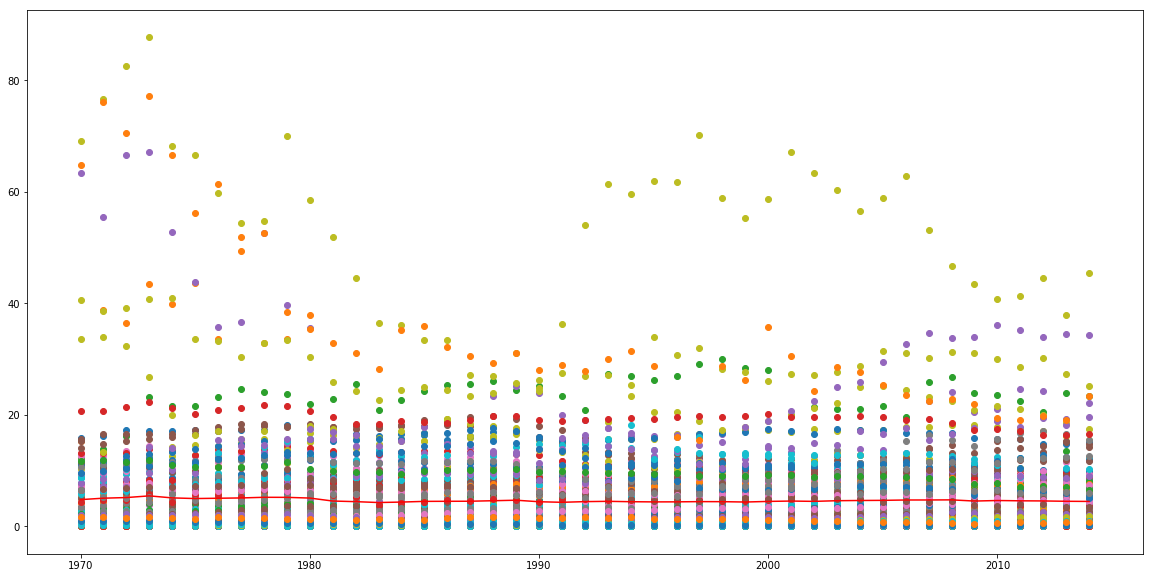

In [33]:
CO2 = co2.set_index("country")
CO2.columns
CO2_datas = [1970,1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,1989, 1990, 1991, 1992, 1993, 1994, 1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
CO2_anos = CO2.loc[:, CO2_datas]
CO2_anos_t = CO2_anos.T
medias_CO2 = CO2_anos.mean()
plt.figure(figsize=(20,10))
for pais in CO2_anos_t.columns:
    plt.scatter(x=CO2_anos_t.index, y=CO2_anos_t[pais])
plt.plot(medias_CO2.index,  medias_CO2, color="r")

In [34]:
#Dados de 2000
co2_00 = co2.loc[:, ["country", 2000]]
pib_00 = pib.loc[:, ["country", 2000]]

In [35]:
#Trocando o índice das tabelas
co2_index = co2_00.set_index("country")
pib_index = pib_00.set_index("country")

In [36]:
#Removendo países sem dados
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

In [37]:
#Juntando as duas tabelas
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2000 CO2 Emissions (tones per person)', '2000 GDP per capita']
co2_pib

,2000 CO2 Emissions (tones per person),2000 GDP per capita
country,,
Albania,0.9680,2340.0
Algeria,2.8200,3540.0
Andorra,8.0200,40800.0
Angola,0.5800,1720.0
Antigua and Barbuda,4.1200,12000.0
Argentina,3.8400,8180.0
Armenia,1.1300,1400.0
Australia,17.3000,44300.0
Austria,7.7200,42000.0


In [38]:
#Mostrando na tabela os países que assinaram o Protocolo de Kyoto
kyoto = ['Antigua and Barbuda','Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Chile','China','Costa Rica','Croatia','Cuba','Czech Republic','Denmark','Ecuador','Egypt','El Salvador','Estonia','Fiji','Finland','France','Germany','Greece','Guatemala','Honduras','Indonesia','Ireland','Israel','Italy','Japan','Kazakhstan','South Korea','Latvia','Lithuania','Luxembourg','Malaysia','Maldives','Mali','Malta','Marshall Islands','Mexico','Micronesia, Fed. Sts.','Netherlands','New Zealand','Nicaragua','Niger','Norway','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Romania','Russia','St. Lucia','St. Vincent and the Grenadines','Samoa','Seychelles','Slovak Republic','Slovenia','Solomon Islands','Spain','Sweden','Switzerland','Thailand','Trinidad and Tobago','Turkmenistan','Tuvalu','Ukraine','United Kingdom','Uruguay','Uzbekistan','Vietnam','Zambia']
co2_pib.loc[:, "Kyoto Protocol"] = 0
co2_pib.loc[kyoto, "Kyoto Protocol"] = 1

In [39]:
#Tabela final separada por assinantes e não assinantes
co2_pib.sort_values('Kyoto Protocol', inplace = True)
co2_pib

,2000 CO2 Emissions (tones per person),2000 GDP per capita,Kyoto Protocol
country,,,
Albania,0.9680,2340.0,0
Mozambique,0.0747,257.0,0
Morocco,1.1800,1970.0,0
Montenegro,2.8400,4950.0,0
Mongolia,3.1300,1600.0,0
Moldova,0.8360,968.0,0
Mauritius,2.2700,5560.0,0
Mauritania,0.4330,998.0,0
Malawi,0.0764,385.0,0


In [40]:
#Tabela final ordenada pelas emissões de gás carbônico
co2_pib.sort_values('2000 CO2 Emissions (tones per person)', inplace = True)
co2_pib

,2000 CO2 Emissions (tones per person),2000 GDP per capita,Kyoto Protocol
country,,,
"Congo, Dem. Rep.",0.0173,290.0,0
Chad,0.0211,463.0,0
Burundi,0.0424,228.0,0
Ethiopia,0.0534,197.0,0
Uganda,0.0595,412.0,0
Niger,0.0614,322.0,1
Rwanda,0.0658,327.0,0
Central African Republic,0.0713,412.0,0
Mozambique,0.0747,257.0,0


In [41]:
#Tabela final ordenada pelo PIB per capita
co2_pib.sort_values('2000 GDP per capita', inplace = True)
co2_pib

,2000 CO2 Emissions (tones per person),2000 GDP per capita,Kyoto Protocol
country,,,
Ethiopia,0.0534,197.0,0
Burundi,0.0424,228.0,0
Mozambique,0.0747,257.0,0
"Congo, Dem. Rep.",0.0173,290.0,0
Sierra Leone,0.0932,304.0,0
Niger,0.0614,322.0,1
Rwanda,0.0658,327.0,0
Myanmar,0.2190,347.0,0
Malawi,0.0764,385.0,0


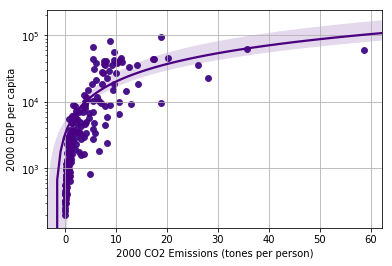

In [42]:
co2_pib.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(co2_pib['2000 CO2 Emissions (tones per person)'],co2_pib['2000 GDP per capita'], color=('indigo'))
plt.grid()

In [43]:
co2_pib['2000 CO2 Emissions (tones per person)'].corr(co2_pib['2000 GDP per capita'])

0.6895169227026365

In [44]:
sim = co2_pib.loc[kyoto,:]

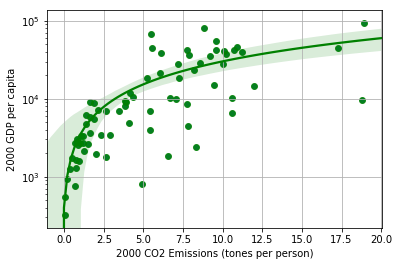

In [45]:
sim.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(sim['2000 CO2 Emissions (tones per person)'],sim['2000 GDP per capita'], color=('green'))
plt.grid()

In [46]:
sim['2000 CO2 Emissions (tones per person)'].corr(sim['2000 GDP per capita'])

0.6644652183316472

Os países com menor PIB per capita emitem menos gás carbônico que países com PIB per capita maior, de modo que no topo das duas tabelas finais se encontram países, em sua maioria, fora do protocolo e com PIB per capita e emissão de gás carbônico baixa, enquanto no final delas, ocorre o oposto. Portanto, países que assinaram o protocolo emitiam mais CO2 e tinham PIB per capita maior.

In [47]:
co2_pib.loc[:, "Kyoto Protocol"] = 0
nao = co2_pib

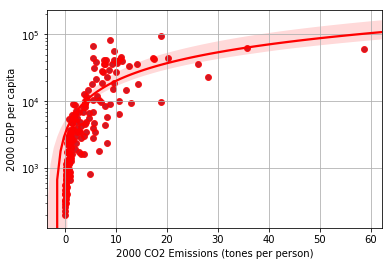

In [48]:
nao.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(nao['2000 CO2 Emissions (tones per person)'],nao['2000 GDP per capita'], color=('red'))
plt.grid()

In [49]:
nao['2000 CO2 Emissions (tones per person)'].corr(nao['2000 GDP per capita'])

0.6895169227026365

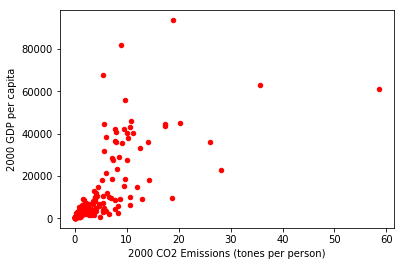

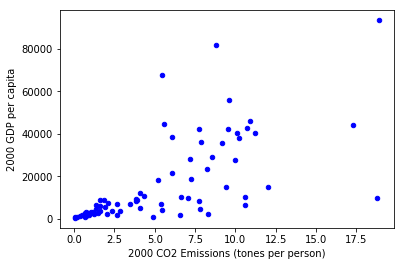

In [50]:
nao.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', color='r')
sim.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', color='b')
#plt.scatter(pib.loc[co2_pib['Kyoto Protocol']==0,2000], co2.loc[co2_pib['Kyoto Protocol']==0,2000], color="r")
#plt.scatter(pib.loc[co2_pib['Kyoto Protocol']==1,2000], co2.loc[co2_pib['Kyoto Protocol']==1,2000], color="b")


In [51]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

#Dados de 20
co2_07 = co2.loc[:, ["country", 2007]]
pib_07 = pib.loc[:, ["country", 2007]]

#Trocando o índice das tabelas
co2_index = co2_07.set_index("country")
pib_index = pib_07.set_index("country")

#Removendo países sem dados
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

#Juntando as duas tabelas
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2007 CO2 Emissions (tones per person)', '2007 GDP per capita']

#Mostrando na tabela os países que assinaram o Protocolo de Kyoto
co2_pib.loc[:, "Kyoto Protocol"] = 0
co2_pib.loc[kyoto, "Kyoto Protocol"] = 1

0.6494183474914059

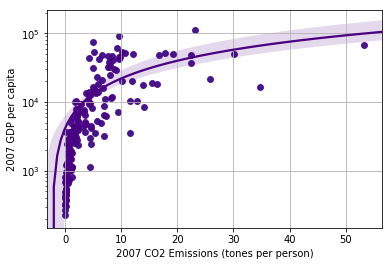

In [52]:
co2_pib.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(co2_pib['2007 CO2 Emissions (tones per person)'],co2_pib['2007 GDP per capita'], color=('indigo'))
plt.grid()
co2_pib['2007 CO2 Emissions (tones per person)'].corr(co2_pib['2007 GDP per capita'])

0.549605781795617

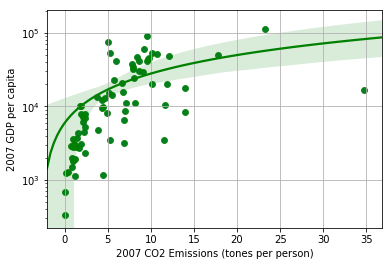

In [53]:
sim = co2_pib.loc[kyoto,:]
sim.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(sim['2007 CO2 Emissions (tones per person)'],sim['2007 GDP per capita'], color=('green'))
plt.grid()
sim['2007 CO2 Emissions (tones per person)'].corr(sim['2007 GDP per capita'])

0.6494183474914059

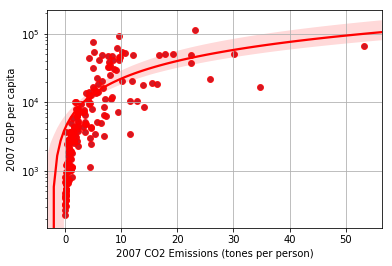

In [54]:
co2_pib.loc[:, "Kyoto Protocol"] = 0
nao = co2_pib
nao.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(nao['2007 CO2 Emissions (tones per person)'],nao['2007 GDP per capita'], color=('red'))
plt.grid()
nao['2007 CO2 Emissions (tones per person)'].corr(nao['2007 GDP per capita'])

In [55]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

#Dados de 20
co2_14 = co2.loc[:, ["country", 2014]]
pib_14 = pib.loc[:, ["country", 2014]]

#Trocando o índice das tabelas
co2_index = co2_14.set_index("country")
pib_index = pib_14.set_index("country")

#Removendo países sem dados
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

#Juntando as duas tabelas
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2014 CO2 Emissions (tones per person)', '2014 GDP per capita']

#Mostrando na tabela os países que assinaram o Protocolo de Kyoto
co2_pib.loc[:, "Kyoto Protocol"] = 0
co2_pib.loc[kyoto, "Kyoto Protocol"] = 1

0.594080145783105

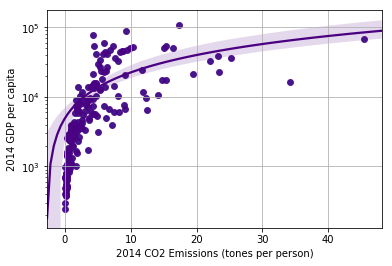

In [56]:
co2_pib.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(co2_pib['2014 CO2 Emissions (tones per person)'],co2_pib['2014 GDP per capita'], color=('indigo'))
plt.grid()
co2_pib['2014 CO2 Emissions (tones per person)'].corr(co2_pib['2014 GDP per capita'])

0.4463882434195381

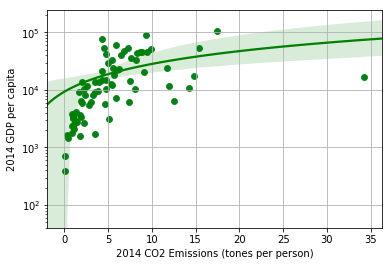

In [57]:
sim = co2_pib.loc[kyoto,:]
sim.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(sim['2014 CO2 Emissions (tones per person)'],sim['2014 GDP per capita'], color=('green'))
plt.grid()
sim['2014 CO2 Emissions (tones per person)'].corr(sim['2014 GDP per capita'])

0.594080145783105

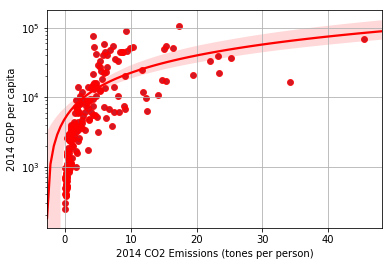

In [58]:
co2_pib.loc[:, "Kyoto Protocol"] = 0
nao = co2_pib
nao.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(nao['2014 CO2 Emissions (tones per person)'],nao['2014 GDP per capita'], color=('red'))
plt.grid()
nao['2014 CO2 Emissions (tones per person)'].corr(nao['2014 GDP per capita'])